#1. Configuración del Ambiente


In [1]:
import pandas as pd
import numpy as np#para funciones matematicas
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import branca.colormap as cm
import xgboost as xgb#algoritmo de aprendizaje automatico para regresion y clasificación
import joblib#exporta el modelo
import geopandas as gpd

from shapely.geometry import Point
from matplotlib.colors import Normalize, to_hex
from folium import Element
from matplotlib import cm
from matplotlib.colors import Normalize, to_hex
from IPython.display import display,HTML
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split#metodo que nos ayuda a separar una base
from sklearn.metrics import mean_squared_error#metodo para calcular RMSE
from sklearn.model_selection import GridSearchCV#para hiperparametros del modelo
from math import radians, sin, cos, sqrt, atan2

#2. Exploración de Datos

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ciencia-de-datos/@ElProfeAlego/BASES_DE_DATOS_PROFE_ALEJO/viviendas_en_california/California_Houses.csv')
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [3]:
df.info()
#el DataFrame tiene 20640 filas con 14 columnas y no tiene valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [4]:
#creo una copia del dataframe original
df_original = df.copy()

In [5]:
df_original.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


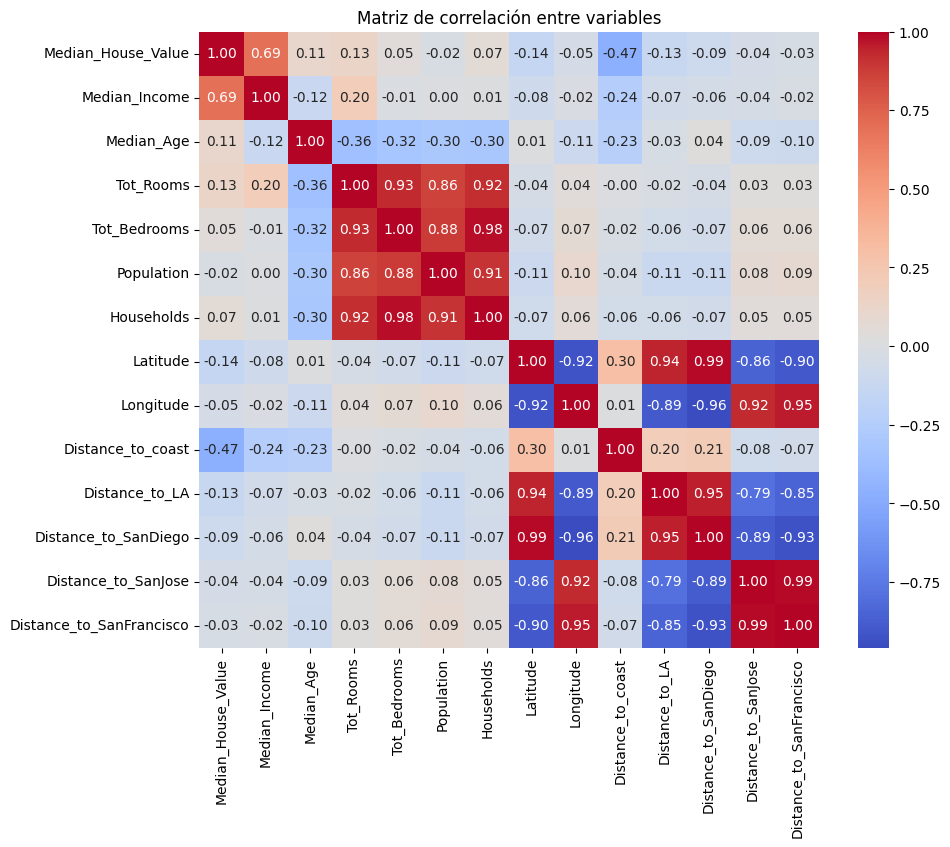

In [6]:

# Calcula la matriz de correlaciones
correlation_matrix = df_original.corr()

# Muestra el mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

#####Variable objetivo(target)
#####Median_House_Value: Es la variable que queremos predecir.

#####1. Median_Income(Ingreso medio por hogar en la zona): Su correlación positiva es de 0.69 las zonas con más ingresos suelen tenen viviendas más caras.

#####2. Median_Age(Edad promedio habitantes en la zona): su correlación es baja 0.11, su relación con las otras variables es muy intensa, nos puede ayudar con zonas nuevas o que estan deterioradas.

#####3. Tot_Rooms(Total de habitaciones en las viviendas en la zona): Nos indica el tamaño de la vivienda.

#####4. Latitude: Su correlación es moderada -0.14 nos permite analizar patrones espaciales importantes como que el sur tiende a tener viviendas más costosas que el norte.

#####5. Longitude: Su correlación es baja -0.046 nos puede ayudar junto a latitude si hay diferencias de valor en la costa y el interior del estado.

#####6. Distance_to_coast: Tiene una correlación negativa -0.47 esto quiere decir que mientras más cerca del mar, más cara es la vivienda.

#####7. Distance_to_LA(distancia de la zona a los Angeeles): De las ciudades Los Angeles es la que mayor tiene correlacción -0.13 y afecta directamenete al valor inmobiliario.


##Estado de California


In [7]:

#dibujo un circulo rojo centrado
def centro_geografico(df_original,#creo un mapa
                      zoom=5,#nivel de zoom
                      color_centro='red',#color del circulo
                      radio_centro=5,#tamaño del circulo
                      ):
  centro_latitud = df_original['Latitude'].mean()
  centro_longitud = df_original['Longitude'].mean()

  mapa = folium.Map(location=[centro_latitud,
                              centro_longitud],
                    zoom_start=zoom)

  folium.CircleMarker(

                      location=[centro_latitud,centro_longitud],
                      radius=radio_centro,
                      color=color_centro,
                      fill=True,
                      fill_opacity =0.7,
                      popup = 'Centro Geografico'


  ).add_to(mapa)

  return mapa
mapa = centro_geografico(df_original)
mapa



####El circulo azul es el centro geografico de latidudes y longitudes del estado de California, lo podemos integrar al modelo para mejorar la precisión y compresión del modelo XGBoost.

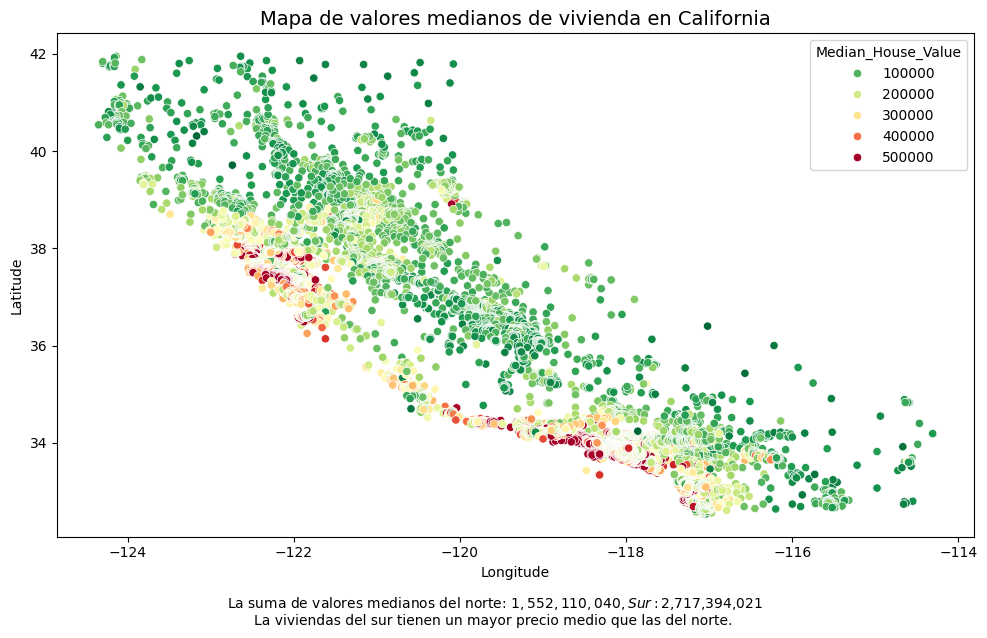

In [8]:

# Creo un mapa centrado en California

#creo una mascara para el norte y sur
norte = df_original['Latitude']>= 37
sur = df_original['Latitude'] < 37

#Calculo la suma total de los valores medio por region
suma_norte = df_original.loc[norte,'Median_House_Value'].sum()
suma_sur = df_original.loc[sur,'Median_House_Value'].sum()

#Conclusión
if suma_sur > suma_norte:
  conclusion = 'La viviendas del sur tienen un mayor precio medio que las del norte. '

else:
  conclusion = 'Las viviendas del norte tienen un mayor precio medio que las del sur.'


palette = sns.color_palette('RdYlGn_r', as_cmap=True)#creo una paleta de colores en forma de mapa de calor
plt.figure(figsize=(10,6))#creo una figura 10 de ancho con 6 de alto
sns.scatterplot(
    data=df_original,#mi dataframe
    #coordenadas como ejes
    x='Longitude',
    y='Latitude',
    hue='Median_House_Value',#los puntos se colorean segun el valor medio de la vivienda
    palette = palette,#uso la paleta de colores definida antes RdYlGn_r
    legend=True#la leyenda me guia con los precios que corresponde a las viviendas
)



#Etiquetas y conclusiones
plt.title('Mapa de valores medianos de vivienda en California', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#leyenda parte inferior
plt.figtext(
    0.5,-0.05,
    f'La suma de valores medianos del norte: ${suma_norte:,.0f}, Sur: ${suma_sur:,.0f}\n{conclusion}',
                                                                                          ha='center',
              fontsize=10,


)

plt.tight_layout()
plt.show()

###Podemos dar clic en cada punto para saber el valor medio de cada vivienda

In [9]:
#llamo la funcion mapa
mapa = centro_geografico(df_original)

#agrego los puntos con popups (ventana emergente para cada punto indicando el precio promedio de cada vivienda)

for _, row in df_original.iterrows():
  folium.CircleMarker(
      location=[row['Latitude'],row['Longitude']],
      radius=3,
      color='blue',
      fill=True,
      fill_opacity=0.7,
      popup=f"Valor medio: ${row['Median_House_Value']:,.0f}"

  ).add_to(mapa)

mapa


Output hidden; open in https://colab.research.google.com to view.

####Punto Rojo: Centro geografico calculado apartir del promedio de latitudes y longitudes de df_original.<br>

####Criculos azules: Cada punto corresponde a la posición de cada vivienda.<br>

####Al hacer clic en cada punto, se despliega una ventana emergente que muestra el valor medio de cada vivienda.

#En este mapa podemos visualizar como los precios cambian segun su color

In [42]:

# Centro del mapa
center = [df_original['Latitude'].mean(), df_original['Longitude'].mean()]

# Crear colormap con escala entre valores mínimo y máximo
colormap = cm.linear.RdYlGn_11.scale(df_original['Median_House_Value'].min(), df_original['Median_House_Value'].max())

# Crear mapa base
map_colored = folium.Map(location=center, zoom_start=6)

# Agregar puntos con color según Median_House_Value
for _, row in df_original.iterrows():
    color = colormap(row['Median_House_Value'])
    folium.CircleMarker(
        [row['Latitude'], row['Longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"House Value: {row['Median_House_Value']}"
    ).add_to(map_colored)

# Añadir leyenda
colormap.caption = 'Median House Value'
colormap.add_to(map_colored)


leyenda_html = '''
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 300px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;
    box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
  <strong>Interpretación de los datos:</strong><br>
  Las viviendas más caras se concentran cerca de la costa de California,<br>
  particularmente en ciudades como San Francisco y Los Ángeles.
  A medida <br>que se alejan de la costa, los precios disminuyen.<br>

</div>
'''

# Añadir al mapa como un Element
map_colored.get_root().html.add_child(Element(leyenda_html))

# Mostrar mapa
map_colored

Output hidden; open in https://colab.research.google.com to view.

In [11]:
#creo un mapa
centro_latitud = df_original['Latitude'].mean()
centro_longitud = df_original['Longitude'].mean()

mapa = folium.Map(location=[centro_latitud,centro_longitud],zoom_start=6)

#datos de coordenados
latitud_longitud = df_original[['Latitude','Longitude']].values.tolist()

#capa de calor
HeatMap(
    latitud_longitud,
    radius=8,
    blur=10,
    max_zoom = 13
).add_to(mapa)

#titulo
titulo_html = '''
  <div style= "position:fixed;
      top:10;
      left:50px;
      width:95%;
      z-index:1000;
      font-size:24px;
      font-wigth:bold;
      background-color:rgba(255,255,255,0.8);
      padding:10px;
      border-radius:8px;
      box-shadow:2px 2px 6px rgba(0,0,0,0.3);">
    Densidad Espacial de las Viviendas en California
  </div>

'''
leyenda_html = '''
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 230px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;
    box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
  <strong>Interpretación de los datos:</strong><br>


  Las viviendas más caras se <br>concentran cerca costa de<br>
  San Francisco y Los Ángeles<br> que estan ubicadas al sur del<br> estado.
  La mayor parte de las<br> viviendas estan ubicadas en<br> ciudades y sus alrededores


</div>
'''
mapa.get_root().html.add_child(Element(titulo_html))
mapa.get_root().html.add_child(Element(leyenda_html))

mapa


###Los Ángeles:<br>
###En los Ángeles estan ubicados la industria del entretenimiento en hollywood y Silicon Beach <br>un area donde hacen presencia gandes empresas como Google,Youtube,Meta etc..<br>
###La llegada de estas empresas ha aumentado la demanda de las viviendas en esta zona.

#3) Procesando los datos

In [12]:
#verificando si tenemos datos duplicados

df_original.duplicated().sum()

np.int64(0)

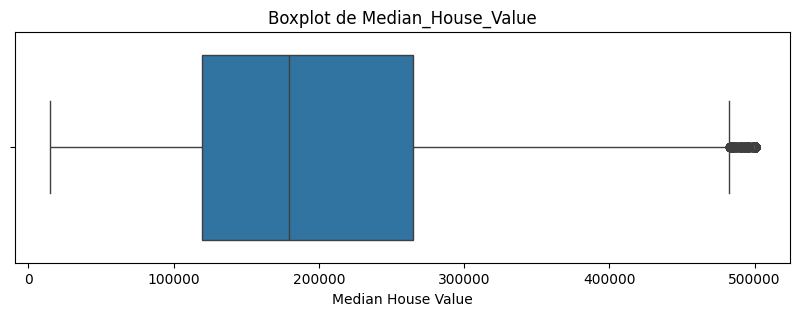

In [13]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_original['Median_House_Value'])
plt.title("Boxplot de Median_House_Value")
plt.xlabel("Median House Value")
plt.show()

In [14]:
outliers = df_original[df_original['Median_House_Value'] > 410000].shape[0]
outliers

1654

In [15]:
df_original = df_original[df_original['Median_House_Value'] <= 410000]


In [16]:
# Elimino los datos atipicos
Q1 = df_original['Median_House_Value'].quantile(0.25)
Q3 = df_original['Median_House_Value'].quantile(0.75)
IQR = Q3 - Q1


# Definir límites inferior y superior para identificar outliers
bajo = Q1 - 1.5 * IQR
alto = Q3 + 1.5 * IQR

df_nuevo= df_original[(df_original['Median_House_Value']>=bajo) &
                      (df_original['Median_House_Value']<=alto)]




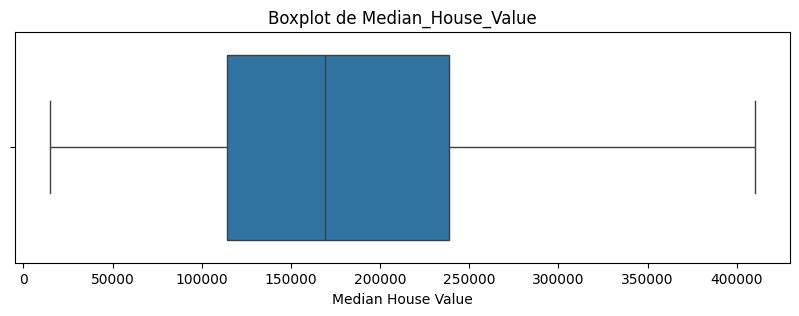

In [38]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_nuevo['Median_House_Value'])
plt.title("Boxplot de Median_House_Value")
plt.xlabel("Median House Value")
plt.show()

In [17]:
df_nuevo.shape

(18986, 14)

En df_original no hay datos duplicados

Solo el 6.2% de mis datos presentan valores atípicos, los cuales serán eliminados<br>

Esto mejora la robustez del modelo, ya que se enfoca en identificar patrones<br>representativos de la mayoría del conjunto de datos. Conservar esos outliers podría <br>introducir ruido y afectar la precisión en las predicciones.

#Entrenando el modelo XGBoost

##Separo las variables para entrenamiento y prueba

In [18]:

#El modelo se va entrenar con un subconjunto de variables seleccionadas como geografica y socio-economica
X= df_nuevo.drop(['Median_House_Value','Tot_Bedrooms','Distance_to_SanDiego','Distance_to_SanJose','Distance_to_SanFrancisco','Population','Households'], axis=1)

X


,Median_Income,Median_Age,Tot_Rooms,Latitude,Longitude,Distance_to_coast,Distance_to_LA
1,8.3014,21,7099,37.86,-122.22,10225.733072,554279.850069
2,7.2574,52,1467,37.85,-122.24,8259.085109,554610.717069
3,5.6431,52,1274,37.85,-122.25,7768.086571,555194.266086
4,3.8462,52,1627,37.85,-122.25,7768.086571,555194.266086
5,4.0368,52,919,37.85,-122.25,7768.086571,555194.266086
...,...,...,...,...,...,...,...
20635,1.5603,25,1665,39.48,-121.09,162031.481121,654530.186299
20636,2.5568,18,697,39.49,-121.21,160445.433537,659747.068444
20637,1.7000,17,2254,39.43,-121.22,153754.341182,654042.214020
20638,1.8672,18,1860,39.43,-121.32,152005.022239,657698.007703


In [19]:
#solo toma la columna Median_House_Values que es mi variable predictora
#y la asigno a 'y'

y = df_nuevo['Median_House_Value']
y

,Median_House_Value
1,358500.0
2,352100.0
3,341300.0
4,342200.0
5,269700.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [20]:
#separo los datos de entrenamiento y prueba en cuatro partes


X_train, X_test, y_train, y_test = train_test_split(X,#esta variable no contiene la columna valor promedio de las viviendas
                                                    y,#esta variable solo contiene el valor promedio de las viviendas
                                                    test_size = 0.25,#de los 20640 registros el 25% esta en y_test y y_train y los otros 75% estan en X_train y X_test
                                                    random_state = 42)#la semilla

In [21]:
print('Tamaño de X_train: ',X_train.shape)
print('Tamaño de y_train: ',y_train.shape)
print('Tamaño de X_test: ',X_test.shape)
print('Tamaño de y_test:', y_test.shape)


Tamaño de X_train:  (14239, 7)
Tamaño de y_train:  (14239,)
Tamaño de X_test:  (4747, 7)
Tamaño de y_test: (4747,)


##Predicciones con la API nativa de XGBoost

In [22]:
#Creo una matrix llamada DMatrix
dtrain = xgb.DMatrix(X_train,y_train)#esta matrix esta con las variables de entrenamiento
dtest = xgb.DMatrix(X_test,y_test)#esta matrix esta para variables de prueba




In [23]:
#minimnizar el error cuadratico medio(squarederror) que es objetivo para el modelo

params = {'objective':'reg:squarederror'}
n = 100#cantidad de arboles

model = xgb.train(#entrenamiento
                  params=params,#parametros que  colocamos arriba
                  dtrain=dtrain,#Base de entrenamiento que es una matrix
                  num_boost_round=n#cantidad de arboles (100)
                  )

pred = model.predict(dtest)#guarda la prediccion del modelo


In [24]:
#conociendo RMSE del modelo con la informacion de distancia a la costa
mse = mean_squared_error(dtest.get_label(),#accedo a los valores dentro de la matrix
                          pred,#hago la comparacion
                         )
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')#distancia entre el valor promedio real a valor a pronosticar


RMSE: 37302.85


Nuestro RMSE es de 37.302.85

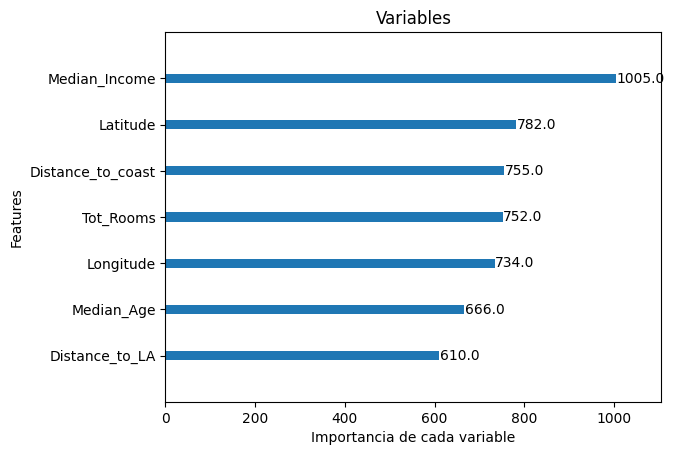

In [25]:
#importancia de cada variable

xgb.plot_importance(model)
plt.title('Variables')
ax = plt.gca()
ax.set_xlabel("Importancia de cada variable")
plt.grid(False)
plt.show()

en el eje x es el conteo de cuantas veces una variable fue un nodo de decisión en cada uno de los arboles construido.

##Validación durante el entrenamiento

In [26]:
params = {'objective':'reg:squarederror'}#minimnizar el error cuadratico medio(squarederror) que es objetivo para el modelo

n= 1000#cantidad de arboles

#el modelo compara en cada ejecucion, compara la base de entrenamiento con la base de prueba
evaluacion = [(dtrain,'entrenamiento'),(dtest,'validación')]


#entrenando el modelo
model = xgb.train(
    params = params,#el objetivo que va intentar cada arbol de decision
    dtrain = dtrain,#la base de entrenamiento para que el modelo se entrene
    num_boost_round = n,#cantidad de arboles
    evals= evaluacion,#valida para saber que tan lejos estuvieron los resultados pronosticados
    early_stopping_rounds = 10#va hacer una verificacion cada 10 arboles, si es igual a la anterior va para las ejecuciones indicando que el mejor RMSE para el modelo
)

[0]	entrenamiento-rmse:70419.57960	validación-rmse:70004.29576
[1]	entrenamiento-rmse:60513.99003	validación-rmse:60521.98866
[2]	entrenamiento-rmse:54098.46666	validación-rmse:54597.07874
[3]	entrenamiento-rmse:50226.33931	validación-rmse:51071.75764
[4]	entrenamiento-rmse:47504.39657	validación-rmse:48811.48394
[5]	entrenamiento-rmse:44744.79748	validación-rmse:46315.50099
[6]	entrenamiento-rmse:43449.06198	validación-rmse:45226.06665
[7]	entrenamiento-rmse:42072.91326	validación-rmse:44088.17318
[8]	entrenamiento-rmse:41357.10777	validación-rmse:43580.46953
[9]	entrenamiento-rmse:40597.02776	validación-rmse:42787.95897
[10]	entrenamiento-rmse:39793.92552	validación-rmse:42303.49941
[11]	entrenamiento-rmse:39478.55978	validación-rmse:42159.62479
[12]	entrenamiento-rmse:38946.37574	validación-rmse:41796.09516
[13]	entrenamiento-rmse:38603.09575	validación-rmse:41554.96711
[14]	entrenamiento-rmse:37830.55910	validación-rmse:40973.34089
[15]	entrenamiento-rmse:37529.86318	validación-rms

cada ejecución mejora la anterior, es decir por cada ejecución <br>el arbol esta aprendidneto y para llegar a nuestro RMSE 37476.31786<br> se necesitaron 87 arboles.en nuestro RMSE anterior obtuvimos

 41559.75, en este caso no mejoramos el RMSE


#Hiperparametricos con GridSearchCV

In [27]:
#probando hiperparametros para mejorar el modelo
param ={
    'colsample_bytree':[0.6,0.8,1],#utiliza el 60%(0.6) de las columnas,vuelve a ejecutar el arbol con el 80%(0.8) y luego lo vuelve a ejecutar con 100% de las columnas(1)
    'max_depth':[3,5,10],#genera un arbol de tres niveles con cada una de las combinaciones [0.6,0.8,1], tambien genera un arbol de decision de 5 niveles con las combinaciones [0.6,0.8,1] igualmete con el arbol de 10 niveles
    'subsample':[0.5,0.8,1]#una ejecucion selecciona el 50% de las filas de forma aleatoria para generar el arbol, en la siguiente ejecucion selecciona el 80% de las filas para generar el arbol, de esta forma tambien para el siguiente parametro


}

#inicializo el modelo
gbm =xgb.XGBRegressor()


grid = GridSearchCV(
    estimator=gbm,#el modelo que voy a ejecutar
    param_grid = param,#donde estan las combinaciones
    scoring = 'neg_mean_squared_error',#minimiza el mse en negativo
    cv = 5,#divide los datos en 5 partes, ejecuta 5 modelos
    verbose=1,#mostrar cada uno de las ejecuciones
)
grid.fit(X,y)#entrena el modelo con las variables originales
print('El mejor RMSE de todas las pruebas: ',np.sqrt(np.abs(grid.best_score_)))
print('Mejores parametros: ',grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
El mejor RMSE de todas las pruebas:  53163.228279748975
Mejores parametros:  {'colsample_bytree': 0.6, 'max_depth': 3, 'subsample': 0.8}


##Tasa de aprendizaje

[0]	entrenamiento-rmse:83877.30626	validación-rmse:82902.54340
[100]	entrenamiento-rmse:42738.59817	validación-rmse:43340.43150
[200]	entrenamiento-rmse:40036.81906	validación-rmse:41085.56612
[300]	entrenamiento-rmse:38378.86972	validación-rmse:40034.16051
[400]	entrenamiento-rmse:37137.88485	validación-rmse:39260.92954
[500]	entrenamiento-rmse:36189.53499	validación-rmse:38778.83430
[600]	entrenamiento-rmse:35348.57449	validación-rmse:38418.21900
[700]	entrenamiento-rmse:34619.59597	validación-rmse:38143.95604
[800]	entrenamiento-rmse:33953.11162	validación-rmse:37892.05892
[900]	entrenamiento-rmse:33324.37697	validación-rmse:37663.69838
[989]	entrenamiento-rmse:32904.86350	validación-rmse:37572.04099


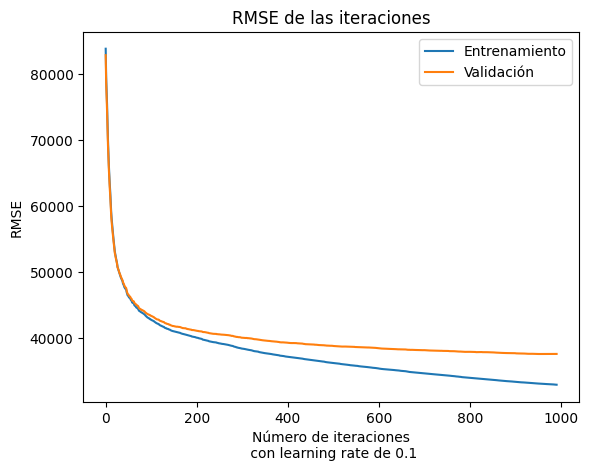

In [28]:
# estos parametros son los datos del codgio anterior

# Usa los mejores parámetros encontrados por GridSearchCV y una única tasa de aprendizaje
params = {
    'objective':'reg:squarederror',
    'colsample_bytree': 0.6, # utiliza el 80% de las columnas
    'max_depth': 3, # genera un arbol con tres niveles
    'subsample': 0.8, # ejecuta el 100% de las filas
    'learning_rate': 0.1, # por cada iteracion aprende un 0.1%

    'reg_alpha': 0.01,
    'reg_lambda': 1.5
}

evals_resultado = {}

model = xgb.train(
    params = params,
    dtrain = dtrain,
    num_boost_round = 1500,#cantidad de arboles
    early_stopping_rounds = 25,#cada 25 iteraciones valida con la anterior y si es mejor para la ejecucion
    verbose_eval = 100,#muestra el resultado cada 10 arboles
    evals = [(dtrain,'entrenamiento'),(dtest,'validación')],
    evals_result = evals_resultado
)

train_rmse = evals_resultado['entrenamiento']['rmse']
test_rmse = evals_resultado['validación']['rmse']

plt.plot(train_rmse,label='Entrenamiento')
plt.plot(test_rmse,label='Validación')
plt.xlabel('Número de iteraciones\n con learning rate de 0.1') # Etiqueta actualizada para reflejar la tasa de aprendizaje
plt.ylabel('RMSE')
plt.title('RMSE de las iteraciones')
plt.legend()
plt.show()

Concluciones:<br>
Durante las primeras iteraciones el modelo aprendio<br> hay una disminución rapida lo que nos indica que el<br> modelo aprendio bien. Alrededor de las 200 iteraciones <br>el modelo dejo de aprender. El modelo se mantuvo con <br> el RMSE 37572.04099
el anterior era de 37476.31786



##Desempeño del Modelo

In [29]:
params = {
        'objective':'reg:squarederror',
    'colsample_bytree': 0.6, # utiliza el 80% de las columnas
    'max_depth': 3, # genera un arbol con tres niveles
    'subsample': 0.8, # ejecuta el 100% de las filas
    'learning_rate': 0.1, # por cada iteracion aprende un 0.1%

    'reg_alpha': 0.01,
    'reg_lambda': 1.5
    }

modelo_final = xgb.train(
    params = params,
    dtrain = dtrain,
    num_boost_round = 1200,#cantidad de arboles
    early_stopping_rounds = 25,
    verbose_eval=False,  # Evita imprimir en cada iteración
    evals = [(dtest, 'validation')] # Agrega el conjunto de validación
)
pred = modelo_final.predict(dtest)
mse = mean_squared_error(dtest.get_label(),pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

RMSE: 37572.89


En el desempeño el modelo sigue consiste con la evaluación con RMSE 37572.89

In [30]:
params = {
       'objective':'reg:squarederror',
    'colsample_bytree': 0.6, # utiliza el 80% de las columnas
    'max_depth': 3, # genera un arbol con tres niveles
    'subsample': 0.8, # ejecuta el 100% de las filas
    'learning_rate': 0.1, # por cada iteracion aprende un 0.1%

    'reg_alpha': 0.01,
    'reg_lambda': 1.5
          }

modelo_final = xgb.train(
    params = params,
    dtrain = dtrain,
    num_boost_round = 1200,#cantidad de arboles
    early_stopping_rounds = 25,
    verbose_eval=False,  # Evita imprimir en cada iteración
    evals = [(dtest, 'validation')] # Agrega el conjunto de validación
)
pred = modelo_final.predict(dtest)
mse = mean_squared_error(dtest.get_label(),pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

RMSE: 37572.89


#Evaluando el desempeño del modelo

In [32]:
params = {   'objective':'reg:squarederror',
    'colsample_bytree': 0.6, # utiliza el 80% de las columnas
    'max_depth': 3, # genera un arbol con tres niveles
    'subsample': 0.8, # ejecuta el 100% de las filas
    'learning_rate': 0.1, # por cada iteracion aprende un 0.1%

    'reg_alpha': 0.01,
    'reg_lambda': 1.5
          }

#validando el modleo
cv_results = xgb.cv(
    dtrain=dtrain,
    params=params,
    nfold=5,
    num_boost_round=1200,
    early_stopping_rounds=25,
    metrics='rmse',
    as_pandas=True,
    seed=42
)

cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,83857.279905,173.762424,83880.284266,815.571942
1,79613.269918,154.962366,79660.253443,751.315203
2,77595.187044,154.237054,77672.087635,861.798829
3,75511.223161,153.112999,75606.537573,793.599376
4,72600.039792,149.313486,72727.824663,743.380951
...,...,...,...,...
1195,31030.852364,111.439813,38632.471234,525.601697
1196,31025.867184,110.951465,38629.657028,526.527760
1197,31018.919906,110.479176,38627.981715,527.346114
1198,31013.505348,109.767630,38627.386899,527.597618


RMSE anterior 37572.89 y en nuestra prueba de <br>validación cruzada es de 38626.375244 es un valor<br> aceptable no esta muy alejado de los valores reales.

#Utilizando el modelo con nuevos datos

In [33]:
joblib.dump(modelo_final,#modelo entrenado
            'modelo_entrenado.pkl')#descargando el archivo

['modelo_entrenado.pkl']

In [34]:
modelo = joblib.load('/content/modelo_entrenado.pkl')

In [35]:

# Cargar shapefile de estados de EE.UU. desde GeoJSON
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
states = gpd.read_file(url)

# Filtrar solo California
california = states[states['name'] == 'California'].geometry.values[0]

# Función para generar puntos válidos dentro del polígono de California
def generar_puntos_dentro(n, poligono):
    puntos_validos = []
    while len(puntos_validos) < n:
        lon = np.random.uniform(poligono.bounds[0], poligono.bounds[2])
        lat = np.random.uniform(poligono.bounds[1], poligono.bounds[3])
        punto = Point(lon, lat)
        if poligono.contains(punto):
            puntos_validos.append((lat, lon))
    return puntos_validos

# Número de puntos
n = 5

# Generar coordenadas válidas dentro de California
coordenadas = generar_puntos_dentro(n, california)
latitudes, longitudes = zip(*coordenadas)

# Crear el DataFrame con datos aleatorios
df_random_california = pd.DataFrame({
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Median_Income': np.round(np.random.uniform(2.5, 15.0, n), 2),
    'Median_Age': np.round(np.random.uniform(20, 60, n), 1),
    'Tot_Rooms': np.random.randint(2, 15, n),
    'Distance_to_LA': np.round(np.random.uniform(0, 800, n), 2),

    'Distance_to_coast': np.round(np.random.uniform(0, 150, n), 2),

})



In [36]:




df_random_california

#el modelo entrenado
modelo = joblib.load('/content/modelo_entrenado.pkl')

# Obtener los nombres de las características del modelo entrenado
# Esto asume que el modelo fue entrenado con el DataFrame 'X'
model_feature_names = modelo.feature_names

# los nuevos datos para que coincidan con el orden de características del modelo
df_ejemplo_2_ordered = df_random_california[model_feature_names]

# Crear DMatrix con los datos ordenados
datos_nuevos = xgb.DMatrix(df_ejemplo_2_ordered)

# predicciones
predciones = modelo.predict(datos_nuevos)

# Crear un nuevo DataFrame a partir de los data de ejemplo originales
precios_pronosticados = df_random_california.copy()

#las predicciones como una nueva columna
precios_pronosticados['Valor_Pronosticado'] = predciones

precios_pronosticados

,Latitude,Longitude,Median_Income,Median_Age,Tot_Rooms,Distance_to_LA,Distance_to_coast,Valor_Pronosticado
0,39.762771,-123.744643,4.20,29.1,4,169.44,96.68,293511.03125
1,38.474072,-120.018943,10.38,57.2,3,680.89,109.25,190590.62500
2,36.211936,-119.576525,6.27,48.7,4,341.92,71.71,305110.34375
3,38.601087,-120.547908,2.73,50.5,12,769.58,75.78,172211.93750
4,34.152634,-115.423463,13.61,28.1,4,578.32,127.68,222400.43750


In [37]:
# mapa centrado en California
mapa = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

#estado
folium.GeoJson(california.__geo_interface__, name='California').add_to(mapa)

# 8. Añadir los puntos con popups
# Itera sobre el DataFrame que contiene los valores predichos
for i, row in precios_pronosticados.iterrows():
    popup_text = f"🏠 Valor medio vivienda: ${row['Valor_Pronosticado']:,.0f}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='home', prefix='fa')
    ).add_to(mapa)

mapa

El margen de error es $RMSE:  37572.89